<a href="https://colab.research.google.com/github/kelseykyla/knn_emnist/blob/main/KNN_EMNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Dataset


In [ ]:
from os import name
# load the Emnist dataset
mnist_data = fetch_openml('mnist_784', version = 1)

# Convert the X and y to DataFrame
X = pd.DataFrame(mnist_data.data, columns=mnist_data.feature_names) # converts the data into a DataFrame
y = pd.Series(mnist_data.target, name='Target') # converts the target variable to a series.

# Display the shape of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Print the first five rows of the Dataset
print("\n\nFirst five rows of X:\n")
print(X.head())

print("\nFirst five rows of y:\n")
print(y.head())

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Shape of X: (70000, 784)
Shape of y: (70000,)


First five rows of X:

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0      

# Standardize and split the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Standardize the Training set and transform Test set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Transfrom the Test data
X_test = scaler.transform(X_test)

# Print the shape of the Training set and Test set
print(f'The shape of the X train: {X_train.shape}\n')
print(f'The shape of the X test: {X_test.shape}\n')

The shape of the X train: (56000, 784)

The shape of the X test: (14000, 784)



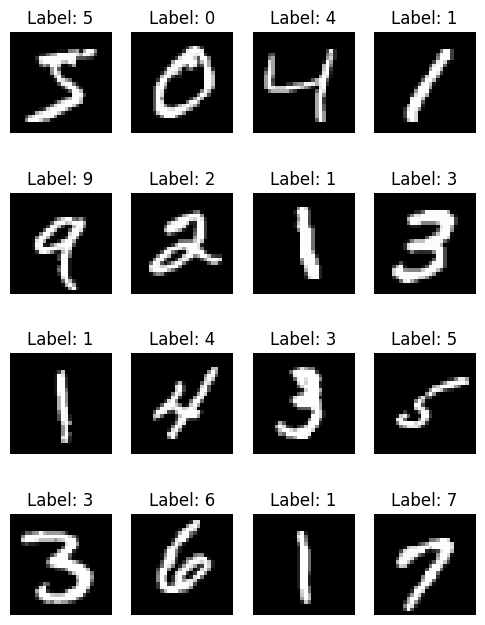

<ipython-input-30-8827ec771198>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


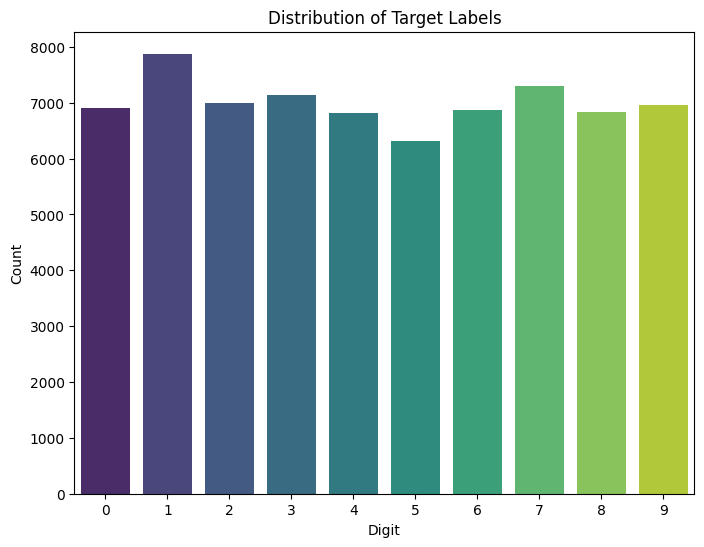

In [ ]:
# Function to plot sample images
def plot_sample_images(X, y, sample_size=16):
    plt.figure(figsize=(6, 8))
    for i in range(sample_size):
        plt.subplot(4, 4, i + 1)
        image = X.iloc[i].values.reshape(28, 28)
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {y.iloc[i]}")
        plt.axis('off')
    plt.show()

# Plotting sample images from the dataset
plot_sample_images(X, y, sample_size=16)

# Function to plot distribution of target labels
def plot_target_distribution(y):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=y, palette='viridis')
    plt.title("Distribution of Target Labels")
    plt.xlabel("Digit")
    plt.ylabel("Count")
    plt.show()

# Plotting the distribution of target labels
plot_target_distribution(y)

# Create and train the model


In [ ]:
# Specify the neighbors
n_neighbors = 3

# Initialize the model
knn = KNeighborsClassifier(n_neighbors)

# Fit the model to the training set
knn.fit(X_train, y_train)

# Predict the model
y_pred = knn.predict(X_test)

# Print the predicted value
print(f"Prediction for the model is: {y_pred}")

Prediction for the model is: ['8' '4' '3' ... '2' '7' '1']


# Evaluate the model performance

In [ ]:
# Create a confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)
print(f"The confusion Matrix is as follows:\n\n {con_matrix}")

# Evaluate models Accuracy
acc_score = accuracy_score(y_test, y_pred)
print(f"\n\nThe accuracy of the KNN model is: {acc_score}\n")

# Calculate the Classification report
class_report = classification_report(y_test, y_pred)
print(f"The summary of the classification report: \n{class_report}")

The confusion Matrix is as follows:

 [[1318    0    4    4    0    5   11    0    1    0]
 [   0 1587    8    0    2    0    1    1    0    1]
 [  12   16 1298   18    4    4    7   10    8    3]
 [   3    5   16 1361    2   11    1   14   10   10]
 [   0   10   13    1 1212    1    3    4    2   49]
 [   6    2    1   29    7 1198   14    0   11    5]
 [  16    4    4    1    4    9 1357    0    1    0]
 [   3   18    7    4   20    1    0 1394    1   55]
 [  13   17   11   27    6   31    4   12 1220   16]
 [   5    5    9   15   23    4    0   48    5 1306]]


The accuracy of the KNN model is: 0.9465

The summary of the classification report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1343
           1       0.95      0.99      0.97      1600
           2       0.95      0.94      0.94      1380
           3       0.93      0.95      0.94      1433
           4       0.95      0.94      0.94      1295
           5       

The KNN model shows strong performance on the MNIST dataset, with high accuracy and balanced precision and recall across most classes. The confusion matrix visualization highlights the specific areas where the model may need improvement, such as reducing the misclassification of certain digits.
